<a href="https://colab.research.google.com/github/ajaythakur3369/CODSOFT/blob/main/Task_3_Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Iris Flower Classification**
## **Developed By - Ajay Thakur (2016kuec2026@iiitkota.ac.in)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota (An Institute of National Importance under an Act of Parliament)**
## **Submitted To - CodSoft**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/CODSOFT/blob/main/Task_3_Iris_Flower_Classification.ipynb)**
## **Project Link (Drive) - [Click here](https://colab.research.google.com/drive/1_zPyBAt-cl3kxWZjusSI9UOZSHU0hVJQ)**

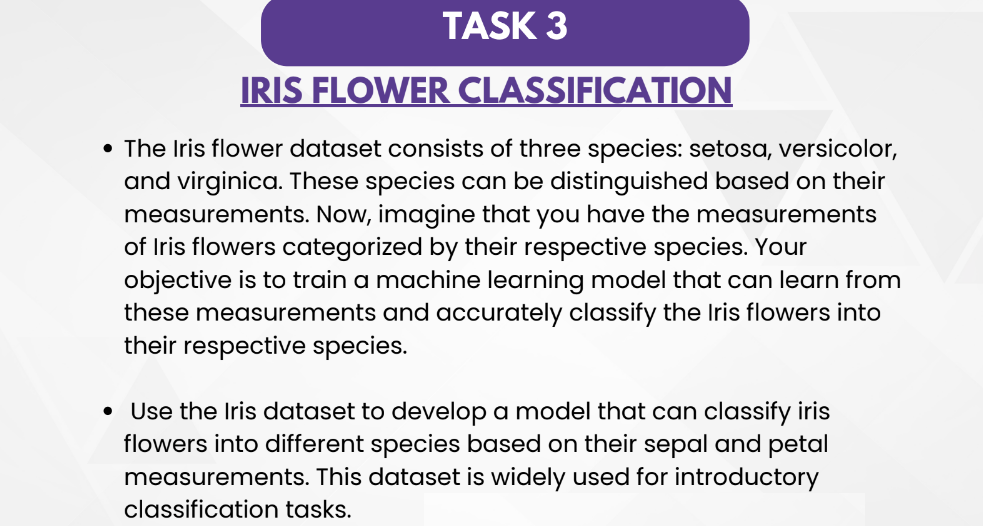

# **Problem Statement -**

*   The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

*   Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.


# **Let's Begin !**

### **Import Libraries**

In [ ]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

### **Import the dataset**

In [ ]:
# Access the Drive from Colab, for accessing required file
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
iris = pd.read_csv('/content/drive/MyDrive/folders/Task_3_CodSoft_File.csv')
iris_points = iris.iloc[:, 1:4]
labels = iris.iloc[:, 4]

**Now let’s have a look at the first five rows of this dataset:**

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**View the info of the data frame that contains details like the count of non-null variables and the column’s datatype along with the column names. It will also show the memory usage.**

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Now let’s have a look at the descriptive statistics of this dataset:**

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**If there are any missing values, then modify them before using the dataset. For modifying you can use the fillna() method. It will fill null values.**

In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**We can see that all values are 0. It means that there are no null values over the entire data frame.**

**The target labels of this dataset are present in the species column, let’s have a quick look at the target labels:**

In [ ]:
print("Target Labels", iris["species"].unique())

Target Labels ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### **Visualizations**

**View the count plot of species feature using seaborn.**

In [ ]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<Axes: >

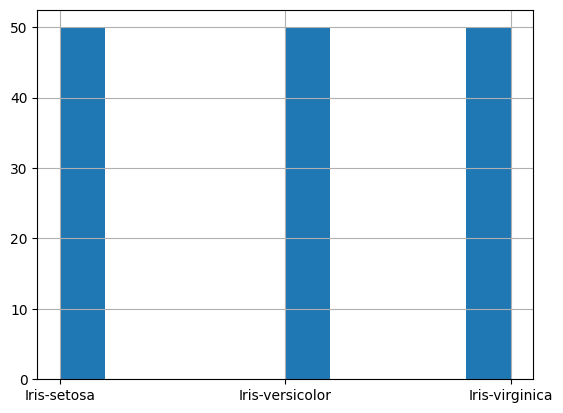

In [ ]:
iris['species'].hist()

In [ ]:
import plotly.express as px
fig = px.scatter(iris, x = "sepal_length", y = "sepal_width", color = "species")
fig.show()

### **Split Data Into Testing and Training Data**

**Before training any kind of ML model, we first need to split data into testing and training data using the train_test_split function from sklearn.**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_points, labels, test_size = 0.2)

### **Normalization/Standardization of Data**

**Before we work on the ML modeling and the data processing, we need to normalize the data for which the code is mentioned below.**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
Standard_obj = StandardScaler()
Standard_obj.fit(x_train)
x_train_std = Standard_obj.transform(x_train)
x_test_std = Standard_obj.transform(x_test)

### **Applying Classification ML model**

**Now that our data is prepared and is ready to go into the various ML models we will be testing and comparing the efficiency of various classification models**

### **SVM (Support Vector Machine)**

**The first model we are going to test the SVM Classifier. The code for the same is mentioned below.**

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state = 0, gamma = .10, C = 1.0)
svm.fit(x_train_std, y_train)
print('Training data accuracy {:.2f}'.format(svm.score(x_train_std, y_train)*100))
print('Testing data accuracy {:.2f}'.format(svm.score(x_test_std, y_test)*100))

Training data accuracy 98.33
Testing data accuracy 96.67


### **KNN (K-Nearest Neighbors)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7, p = 2, metric = 'minkowski')
knn.fit(x_train_std, y_train)
print('Training data accuracy {:.2f}'.format(knn.score(x_train_std, y_train)*100))
print('Testing data accuracy {:.2f}'.format(knn.score(x_test_std, y_test)*100))

Training data accuracy 96.67
Testing data accuracy 93.33


### **Decision Tree**

In [ ]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion = 'gini')
decision_tree.fit(x_train_std, y_train)
print('Training data accuracy {:.2f}'.format(decision_tree.score(x_train_std, y_train)*100))
print('Testing data accuracy {:.2f}'.format(decision_tree.score(x_test_std, y_test)*100))

Training data accuracy 100.00
Testing data accuracy 80.00


**The testing accuray in this model as well is still around 80%, hence so far SVM gives the best results.**

### **Random Forest**

**Random Forest is a more complex and better decision tree in Machine Learning. The implementation of same is shown below.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train_std, y_train)
print('Training data accuracy {:.2f}'.format(random_forest.score(x_train_std, y_train)*100))
print('Testing data accuracy {:.2f}'.format(random_forest.score(x_test_std, y_test)*100))

Training data accuracy 100.00
Testing data accuracy 90.00


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 9,  0,  0],
       [ 0,  6,  0],
       [ 0,  3, 12]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 90.00


**We can see that accuracy of the model is 96.67 percent which is very accurate.**

### **Summary**

**So this is how you can train a machine learning model for the task of Iris classification using Python. Iris Classification is one of the most popular case studies among the data science community. Almost every data science newbie has solved this case study once in their life. I hope you liked this article on the task of classifying Iris species with machine learning using Python. Feel free to ask your valuable questions in the comments section below.**